# Classification Algorithms

There are two major types of supervised machine learning problems, called classifica‐
tion and regression.

In this workshop we will focus on classification algorithms.

In classification, the goal is to predict a class label, which is a choice from a predefined
list of possibilities.

Classification is sometimes separated into binary classification,
which is the special case of distinguishing between exactly two classes, and multiclass
classification, which is classification between more than two classes. You can think of
binary classification as trying to answer a yes/no question.

To start-off lets have a quick look at binary classification algorithms.

Disclaimer: This is not an exhaustive list but just some of the algorithms that are popular and that I am familiar with.

# KNeighborsClassifier

In [1]:
# suprress warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np

# import libraries to plot in the notebook
%matplotlib inline
from matplotlib import pyplot as plt

In [3]:
import mglearn
# generate dataset
X, y = mglearn.datasets.make_forge()

/Users/usmanrizwan/.virtualenvs/RPA/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/Users/usmanrizwan/.virtualenvs/RPA/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
/Users/usmanrizwan/.virtualenvs/RPA/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Ple

In [4]:
print('How many features in X: ', X.shape)
print('How many features in Y: ', y.shape)

How many features in X:  (26, 2)
How many features in Y:  (26,)


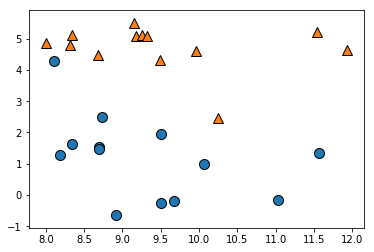

In [5]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

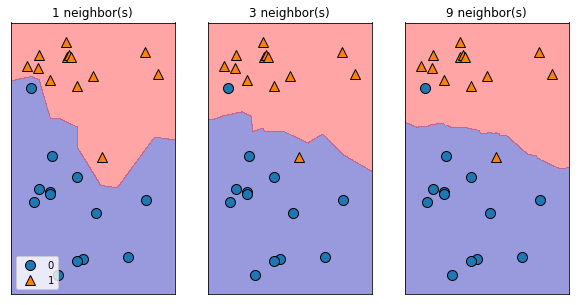

In [6]:
from sklearn.neighbors import KNeighborsClassifier

fig, axes = plt.subplots(1, 3, figsize=(10, 5))


for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax )
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    axes[0].legend(loc=3)

Using more and more neighbours lead to a smoother decision boundary.

# Logistic Regression

Logistic regression is a method in which a linear function is passed through a sigmoid function to calculate logits (or scores).

<div>
<img src="images/logistic_regression.jpeg" width="500"/>
</div>
Source: <a href="https://towardsdatascience.com/machine-learning-part-3-logistics-regression-9d890928680f">Source: Machine Learning Part 3 : Logistic Regression</a>

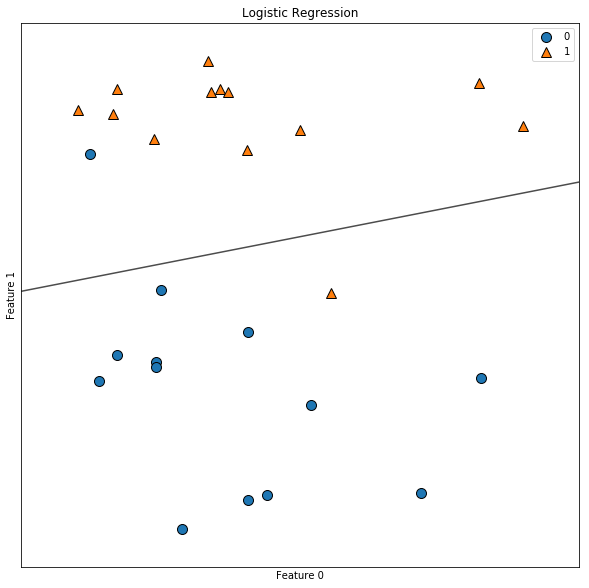

In [7]:
from sklearn.linear_model import LogisticRegression

fig, axes = plt.subplots(1, 1, figsize=(10, 10), )

model = LogisticRegression()

clf = model.fit(X, y)

mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=axes, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=axes)
axes.set_title("Logistic Regression")
axes.set_xlabel("Feature 0")
axes.set_ylabel("Feature 1")
axes.legend()

Points above the decision boundary will be predicted as belonging to class "1" while the ones below will be class "0".

# Support Vector Machines (SVM)

SVMs are an example of non-probabilistic classification algorithm. In SVM, we are looking for a decision boundary that best divides a dataset into two classes.

<div>
    <img src="images/svm.png" width="500"/>
</div>
Source: <a href="https://www.kdnuggets.com/2016/07/support-vector-machines-simple-explanation.html">Source: Support Vector Machines: A Simple Explanation</a>

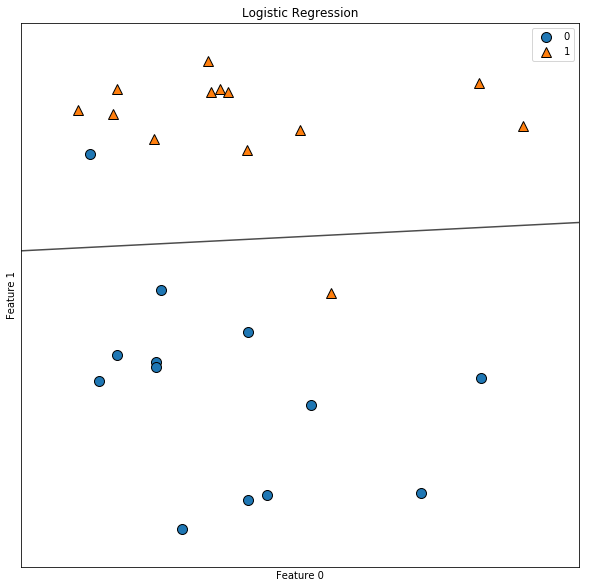

In [8]:
from sklearn.svm import LinearSVC

fig, axes = plt.subplots(1, 1, figsize=(10, 10))

model = LinearSVC()

clf = model.fit(X, y)

mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=axes, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=axes)
axes.set_title("Logistic Regression")
axes.set_xlabel("Feature 0")
axes.set_ylabel("Feature 1")
axes.legend()

SVM algorithms are not very robust to outliers.

Text(0.5, 0, 'Feature 0')

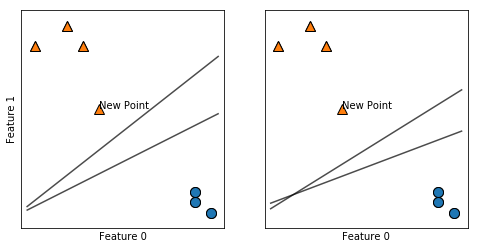

In [9]:
X_ = np.array([[1,8], [3,9], [4,8], [12,0], [11, 0.5], [11, 1]])
y_ = np.array([1,1,1,0,0,0])

new_point = [5,5]
# X_new = np.append(X_, np.array([[1,0]]), axis=0)
X_new = np.append(X_, np.array([new_point]), axis=0)
y_new = np.append(y_, np.array([1]))

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

model = LogisticRegression()

clf = model.fit(X, y)

mglearn.plots.plot_2d_separator(clf, X_, fill=False, eps=0.5, ax=axes[1], alpha=.7)
mglearn.discrete_scatter(X_[:, 0], X_[:, 1], y_, ax=axes[1])

clf = model.fit(X_new, y_new)

mglearn.plots.plot_2d_separator(clf, X_new, fill=False, eps=0.5, ax=axes[1], alpha=.7)
mglearn.discrete_scatter(X_new[:, 0], X_new[:, 1], y_new, ax=axes[1])

axes[1].annotate('New Point', xy=new_point, textcoords='data')

model = LinearSVC()

clf = model.fit(X_, y_)

mglearn.plots.plot_2d_separator(clf, X_, fill=False, eps=0.5, ax=axes[0], alpha=.7)
mglearn.discrete_scatter(X_[:, 0], X_[:, 1], y_, ax=axes[0])

clf = model.fit(X_new, y_new)

mglearn.plots.plot_2d_separator(clf, X_new, fill=False, eps=0.5, ax=axes[0], alpha=.7)
mglearn.discrete_scatter(X_new[:, 0], X_new[:, 1], y_new, ax=axes[0])


# axes[0].scatter(11, 0, color='Orange', s=200)

axes[0].annotate('New Point', xy=new_point, textcoords='data')


axes[0].set_xlabel("Feature 0")
axes[0].set_ylabel("Feature 1")
axes[1].set_xlabel("Feature 0")

In [10]:
# clean up
del X_, y_, X_new, y_new

# Decision Trees

Decision trees are a hierarchy of if/else questions, leading to a decision. We will use a moon dataset for decision tree as it is more illuminationg to highlight the decision boudary of decision tree.

Text(0.5, 1.0, 'Decision tree depth 1')

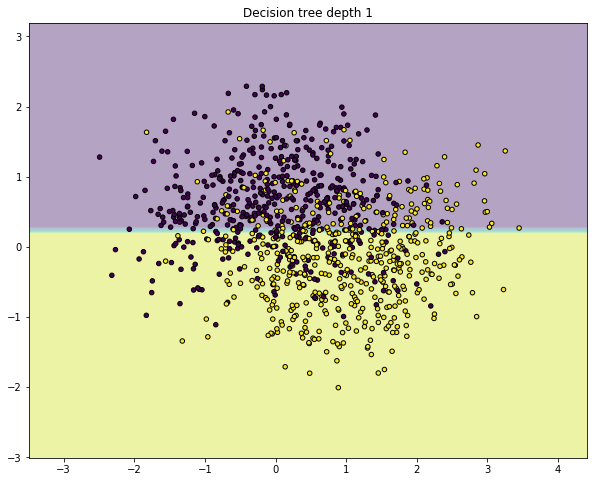

In [11]:
# generate 2d classification dataset
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.6)

from sklearn.tree import DecisionTreeClassifier

dt = 1

clf = DecisionTreeClassifier(max_depth=dt)

clf.fit(X, y)

# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10, 8))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

axarr.contourf(xx, yy, Z, alpha=0.4)
axarr.scatter(X[:, 0], X[:, 1], c=y,
                              s=20, edgecolor='k')
axarr.set_title('Decision tree depth {0}'.format(dt))

Text(0.5, 1.0, 'Decision tree depth 2')

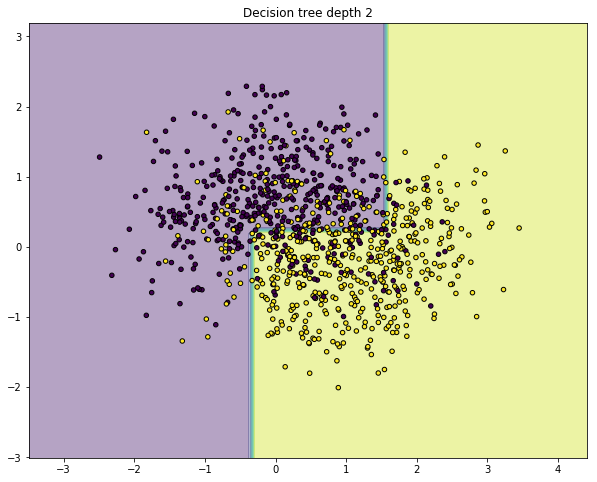

In [12]:
dt = 2
clf = DecisionTreeClassifier(max_depth=dt)

clf.fit(X, y)

# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10, 8))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

axarr.contourf(xx, yy, Z, alpha=0.4)
axarr.scatter(X[:, 0], X[:, 1], c=y,
                              s=20, edgecolor='k')
axarr.set_title('Decision tree depth {0}'.format(dt))

Text(0.5, 1.0, 'Decision tree depth 4')

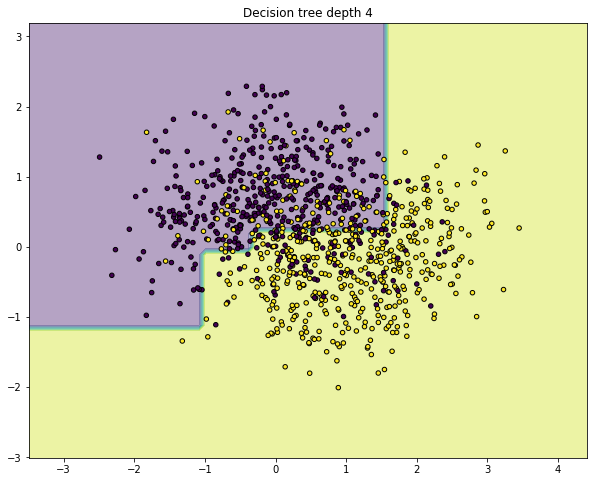

In [13]:
dt = 4
clf = DecisionTreeClassifier(max_depth=dt)

clf.fit(X, y)

# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10, 8))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

axarr.contourf(xx, yy, Z, alpha=0.4)
axarr.scatter(X[:, 0], X[:, 1], c=y,
                              s=20, edgecolor='k')
axarr.set_title('Decision tree depth {0}'.format(dt))

Decision tree boundaries are parallel or perpendicular to the feature axis.

## Complexity of Decision Trees

Decision trees are very easy to overfit. You can have a very deep decition tree that leads to pure leaves at the end. This means that the model has fit the training data with 100% accuracy.

Their are a couple of common strategies to prevent overfitting:
<li> Collapsing nodes that contain little information.
<li> Limiting the maximum depth of the tree.
<li> Limiting the maximum number of leaves.
<li> Requiring a minimum number of points in a node to keep splitting it.
    
Lets explore how tree depth affects the decision tree model performance.

In [14]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


Since the decision tree depth is not specied, the tree can grow deep enough that we end up with pure leaves. The tree has essentially memorized the training data.

Lets now set the decision tree depth to 4.

In [15]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}%".format(100*tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}%".format(100*tree.score(X_test, y_test)))

Accuracy on training set: 98.826%
Accuracy on test set: 95.105%


## Visualizing Decision Tree

In [16]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
feature_names=cancer.feature_names, impurity=False, filled=True)

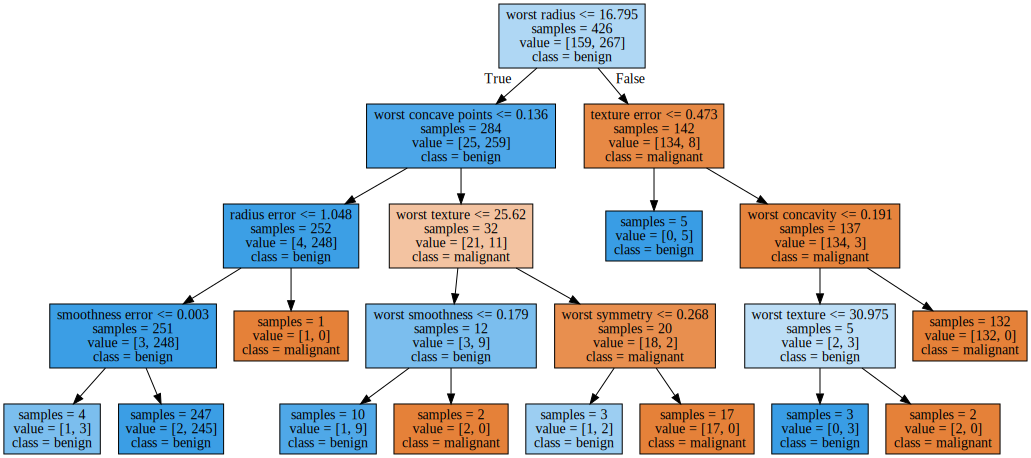

In [17]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

A decision tree is a great machine learning algorithm that is easily explained to nonexperts.

Even a decision tree with a depth of 4 can seem a bit overwhelming. Another great resource that we derive from the decision tree is feature importance. Feature importance is a measure of how important each feature is for
the decision a tree makes.

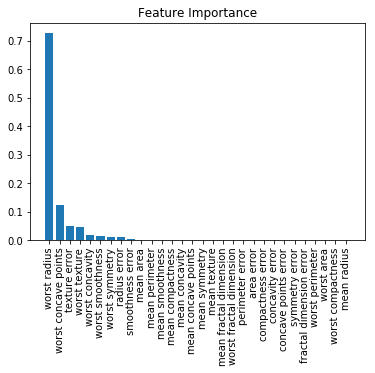

In [18]:
# Calculate feature importances
importances = tree.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [cancer.feature_names[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(cancer.data.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(cancer.data.shape[1]), names, rotation=90)

# Show plot
plt.show()

We see that the most important feauture is also the feature that is used to split the tree at the top. This feature splits the two classes fairly well.

If a feature has a low value in feature_importance_, it doesn’t mean that this feature is uninformative. It only means that the feature was not picked up by the decision tree.

# Ensemble of Decision Trees

Ensembles are combinations of multiple machine learning model to create more powerful models. We will take a look at an ensemble model which has found a wide range of application in classification tasks: random forests.

As observed previously, one of the drawbacks of decision tree is that they tend to overfit. Random forests are oneway to address this problem.

A random forest is a collection of decision tree that are only slightly different from each other. Each tree will work well andoverfit the data in different ways, we can reduce the ovefitting by averaging the decision trees.

Their are a couple of different ways to build a random forest with slightly different trees: 
<li> randomly split training samples between trees
<li> pass different features to each tree

## Analyzing Random Forests 
Let’s apply a random forest consisting of five trees to the two_moons dataset we studied earlier.

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
random_state=42)

# we will be building 5 different decision trees
forest = RandomForestClassifier(n_estimators=5, random_state=2)

forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

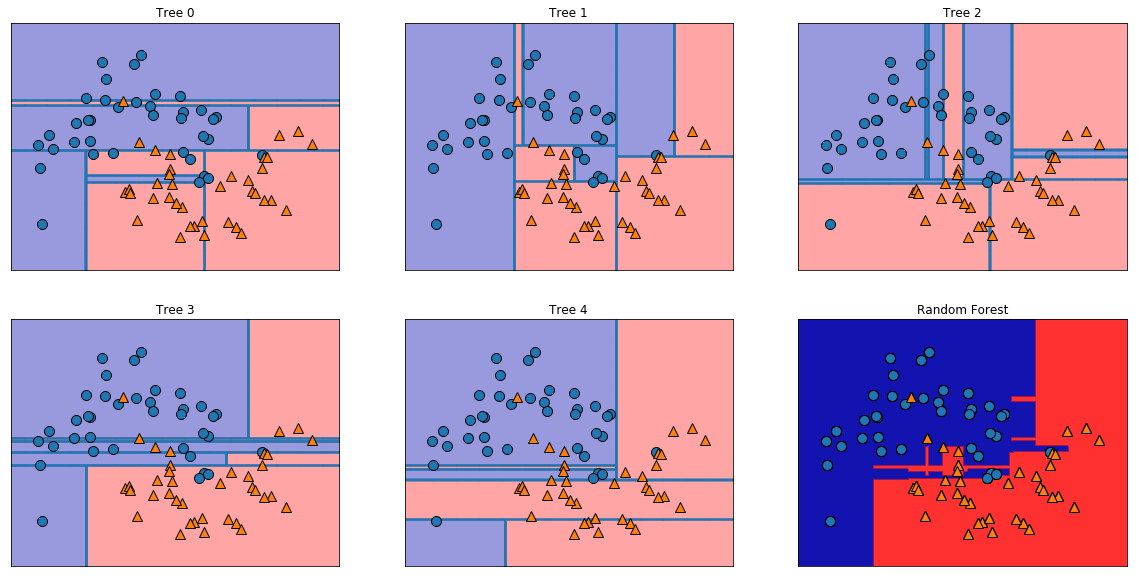

In [20]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],alpha=.4)
    axes[-1, -1].set_title("Random Forest")
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

Each tree has learned different decision boundaries. In real world applications you might see hundreds of decision trees used for a random forest model.

Lets try to apply random forest model with 100 decision trees to the cancer dataset we saw earlier.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}%".format(100*forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}%".format(100*forest.score(X_test, y_test)))

Accuracy on training set: 100.000%
Accuracy on test set: 97.203%


Random forest model performs better than the decision tree model (with a depth of 4) we built earlier (it was 95.2%).

Similarly to decision tree, random forest also provides feature importance which are computed by aggregating the feature importance calculated from each decision tree. Typically the feature importance provided by random forest are more reliable than an individual decision tree.

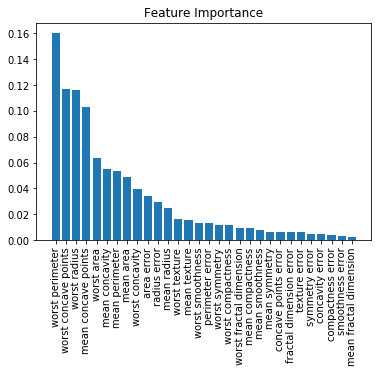

In [22]:
# Calculate feature importances
importances = forest.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [cancer.feature_names[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(cancer.data.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(cancer.data.shape[1]), names, rotation=90)

# Show plot
plt.show()

As you can see that the random forest provides a different feature importance ranking than an individual tree. Because of its inherent randomness a random forest is forced to consider many different explanations.